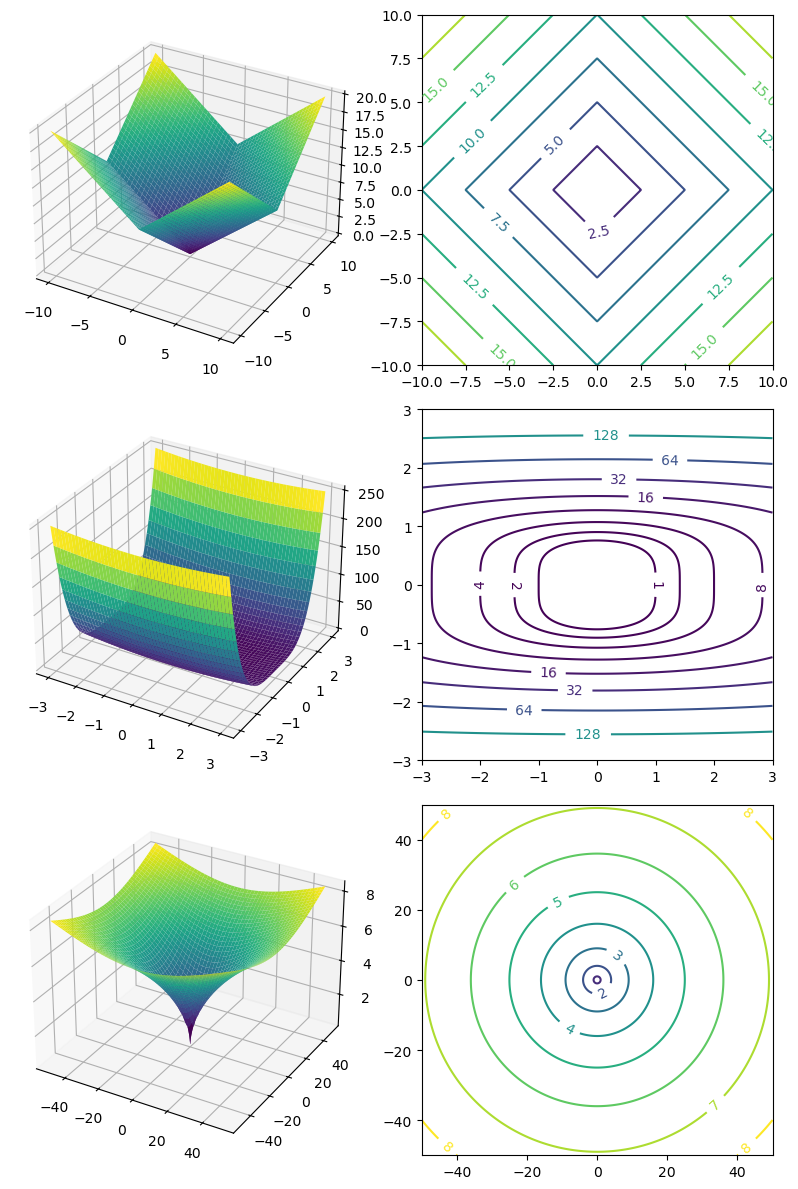

In [61]:
#Problem 1

import numpy as np 
import matplotlib.pyplot as plt

#Generate x and y vals with meshgrid
x_vals = np.linspace(-10, 10, num = 1000)
y_vals = np.linspace(-10, 10, num = 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)



#Generate figure
fig = plt.figure(figsize=(8, 12))

#Calculate output of function from input vals
f1_vals = np.abs(x_vals) + np.abs(y_vals)

#Create surface plot
ax1 = fig.add_subplot(3, 2, 1, projection = '3d')
ax1.plot_surface(x_vals, y_vals, f1_vals, cmap = 'viridis')

#Create contour plot
ax2 = fig.add_subplot(3, 2, 2)
cont2 = ax2.contour(x_vals, y_vals, f1_vals)
ax2.clabel(cont2)
ax2.set_aspect('equal')

#Repeat for f = x^2 + 3y^4
x_vals = np.linspace(-3, 3, num = 1000)
y_vals = np.linspace(-3, 3, num = 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

f2_vals = x_vals**2 + 3 * y_vals**4
ax3 = fig.add_subplot(3, 2, 3, projection = '3d')
ax3.plot_surface(x_vals, y_vals, f2_vals, cmap = 'viridis')

ax4 = fig.add_subplot(3, 2, 4)
levels4 = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256]
cont4 = ax4.contour(x_vals, y_vals, f2_vals, levels = levels4)
ax4.clabel(cont4)
ax4.set_aspect('equal', 'box')

#Repeat for (x^2 + y^2)^(1/4)
x_vals = np.linspace(-50, 50, num = 1000)
y_vals = np.linspace(-50, 50, num = 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

f3_vals = (x_vals**2 + y_vals**2)**(1/4)
ax5 = fig.add_subplot(3, 2, 5, projection = '3d')
ax5.plot_surface(x_vals, y_vals, f3_vals, cmap = 'viridis')

ax6 = fig.add_subplot(3, 2, 6)
levels6 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
cont6 = ax6.contour(x_vals, y_vals, f3_vals, levels = levels6)
ax6.clabel(cont6)
ax6.set_aspect('equal')



plt.tight_layout()
plt.show()


Partial derivative fx: 3*x**2 - 3
Partial derivative fy: 3*y**2 - 6*y
Critical points: [(-1, 0), (-1, 2), (1, 0), (1, 2)]
(-1, 0) discriminant: 36, fxx: -6 Local Maxima
(-1, 2) discriminant: -36, fxx: -6 Saddle Point
(1, 0) discriminant: -36, fxx: 6 Saddle Point
(1, 2) discriminant: 36, fxx: 6 Local Minima
The contour plot visually confirms our critical point classifications.


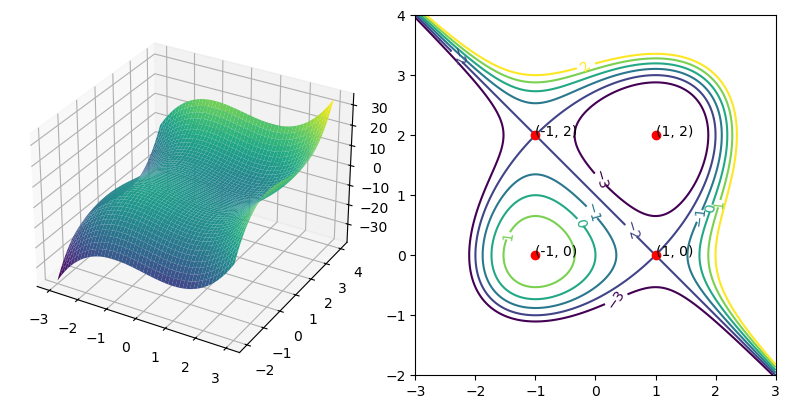

In [ ]:
#Problem 2 

from sympy import symbols, Function, diff, solve

#Use sympy to solve for partial derivatives
x = symbols('x')
y = symbols('y')
f = Function('f')(x, y)

f = x**3 - 3*x + y**3 - 3*(y**2)
fx = diff(f, x)
fy = diff(f, y)

print(f"Partial derivative fx: {fx}")
print(f"Partial derivative fy: {fy}")

#Find roots to get critical points
cp = solve([fx, fy], [x, y])

print(f"Critical points: {cp}")

fxx = diff(fx, x)
fyy = diff(fy, y)
fxy = diff(fx, y)

#Use discriminant and fxx to classify points
disc = fxx * fyy - fxy**2

for point in cp:
    x_val = point[0]
    y_val = point[1]
    
    disc_val = disc.subs({x: x_val, y: y_val})
    fxx_val = fxx.subs({x: x_val, y: y_val})
    
    print(f"{point} discriminant: {disc_val}, fxx: {fxx_val}", end=" ")
    
    if disc_val < 0: 
        print("Saddle Point")
    elif disc_val > 0:
        if fxx_val > 0:
            print("Local Minima")
        elif fxx_val < 0:
            print("Local Maxima")
    else:
        print("Inconclusive")

#Display function in 3d to visualize
x_vals = np.linspace(-3, 3, 1000)
y_vals = np.linspace(-2, 4, 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

f1_vals = x_vals**3 - 3*x_vals + y_vals**3 - 3*(y_vals**2)

fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.plot_surface(x_vals, y_vals, f1_vals, cmap='viridis')


#Create contour
ax2 = fig.add_subplot(1, 2, 2)
levels2 = np.arange(-3, 3, 1)
cont2 = ax2.contour(x_vals, y_vals, f1_vals, levels = levels2)
ax2.clabel(cont2)
ax2.set_aspect('equal')

#Get critical points x and y values
crit_x = [point[0] for point in cp]
crit_y = [point[1] for point in cp]

#Plot the crit points
ax2.plot(crit_x, crit_y, 'ro')

#Label them
for i in range(len(cp)):
    ax2.text(crit_x[i], crit_y[i], f'{cp[i]}')
    
print("The contour plot visually confirms our critical point classifications.")


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Gradient Norm: ||∇f|| = 0.0000043821')

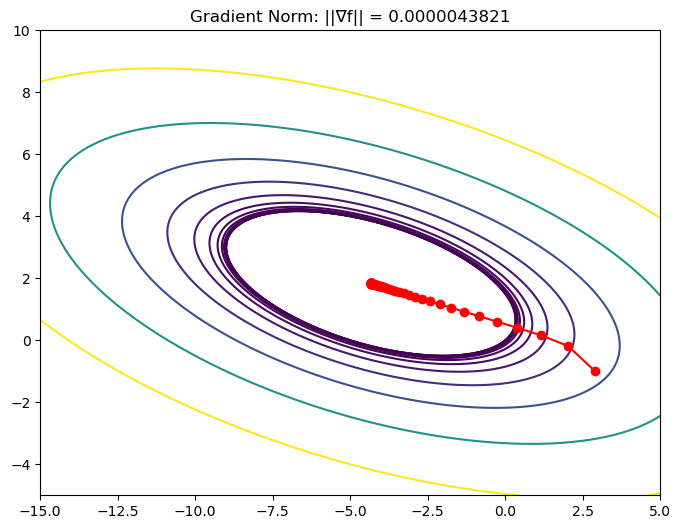

In [ ]:
#Problem 3

#Set initial conditions
x_val = 3
y_val = -5
alpha = .1
iterations = 100

#Generate function and gradient
x = symbols('x')
y = symbols('y')
f = Function('f')(x, y)
f = x**2 + 2*x*y + 4*y**2 + 5*x - 6*y

fx = diff(f, x)
fy = diff(f, y)

#Function for 1 iteration of gradient descent
def grad_iter(x0, y0, alpha, fx, fy):
    
    #Update x and y
    x1 = x0 - alpha * fx.subs({x: x0, y: y0})
    y1 = y0 - alpha * fy.subs({x: x0, y: y0})
    
    #Compute norm
    norm = ((fx.subs({x: x0, y: y0}))**2 + (fy.subs({x: x0, y: y0}))**2)**(1/2)
    
    return x1, y1, norm
    
points_visited = []
gradient_norms = []

#Run 100 times and save data
for _ in range(iterations):
    x_val, y_val, norm = grad_iter(x_val, y_val, alpha, fx, fy)
    points_visited.append((x_val, y_val))
    gradient_norms.append(norm)
    
#Generate points for contour
cont_x = np.linspace(-15, 5, 1000)
cont_y = np.linspace(-5, 10, 1000)
cont_x, cont_y = np.meshgrid(cont_x, cont_y)

cont_f1 = cont_x**2 + 2*cont_x*cont_y + 4*cont_y**2 + 5*cont_x - 6*cont_y
    
#Plot contour
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(1,1,1)
levels1 = [0, .01, .05, .1, .5, 1, 2, 4, 8, 16, 32, 64, 128]
cont1 = ax1.contour(cont_x, cont_y, cont_f1, levels = levels1)
ax1.set_aspect('equal')

#Plot points visited
points_x = [point[0] for point in points_visited]
points_y = [point[1] for point in points_visited]
ax1.plot(points_x, points_y, 'ro', linestyle='-')
ax1.set_title(f'Gradient Norm: ||∇f|| = {gradient_norms[-1]:.10f}')


